In [3]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('factbook.db')
q = 'select * from sqlite_master where type ="table"'
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [9]:
q = 'select * from facts limit 5'
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# Summary Statistics

In [10]:
q = 'select min(population),max(population), min(population_growth),max(population_growth) from facts'
pd.read_sql_query(q,conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


# Outliers

In [11]:
q = 'select * from facts where population = 0'
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [12]:
q = 'select * from facts where population = 7256490011'
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


We see that the country with the least population is Antarctica and the population of earth is 7.2 billion according to the data

# Histograms

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

q = 'SELECT population, population_growth, birth_rate, death_rate FROM facts where population != (SELECT min(population) from facts) and population != (SELECT max(population) from facts)'
pd.read_sql_query(q,conn)

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc66401e6d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc663f7b438>]], dtype=object)

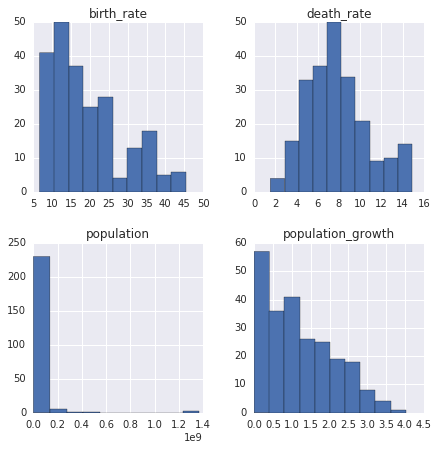

In [20]:
pd.read_sql_query(q,conn).hist(figsize=(7,7))

# Population densities

In [24]:
q = 'SELECT name, cast(population as float)/cast(area_land as float) population_density from facts order by population_density desc'
pd.read_sql_query(q,conn)

,name,population_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


We see that Macau has the highest population density, followed by Monaco and so forth